# Introduction to quantum algorithms with [Qiskit](https://qiskit.org)
$$
\newcommand{\ket}[1]{|#1\rangle}
\newcommand{\Ket}[1]{\left|#1\right\rangle}
\newcommand{\bra}[1]{\langle#1|}
\newcommand{\Bra}[1]{\left\langle#1\right|}
\newcommand{\braket}[1]{\langle#1\rangle}
\newcommand{\u}{\ket\uparrow}
\newcommand{\ub}{\bra\uparrow}
\newcommand{\d}{\ket\downarrow}
\newcommand{\db}{\bra\downarrow}
$$

#### Google's quantum computer:
<img src="./images/googleqcomp.png" width="70%"></img>

#### IBM's quantum computer:
<img src="./images/IBMQuantumComputerZurich.jpg" height="50%"></img>

#### IonQ's Quantum chip:
<img src="./images/IonQ-chip.png" width="80%"></img>

## 2019:
- IBM: 53 qubits working for a very short time
- Google: announces the creation of a 72-qubit quantum chip
- Intel confirms development of a 49-qubit superconducting test chip

### Other players:
- Xanadu.ai
- Zapata
- IonQ
- Rigetti
- PsiQuantum
- etc.

## Why quantum computing?
- Scientific research
- Drug development
- Big Data
- Optimization and AI
- Cryptography
- Market & financial modeling

## Quantum algorithms 
- [Wiki article](https://en.wikipedia.org/wiki/Quantum_algorithm)
- Deutsch-Jozsa: solves a black-box problem which probably requires exponentially many queries to the black box for any deterministic classical computer, but can be done with exactly one query by a quantum computer.
- Bernstein–Vazirani algorithm: is the first quantum algorithm that is exponentially more efficient than classical algorithms.
- <b>Shor's algorithm</b> solves the discrete logarithm problem and the integer factorization problem in polynomial time, whereas the best known classical algorithms take super-polynomial time. 
- HHL algorithm for solving systems of linear equations
- Grover's algorithm
- quantum SVM
- etc.

In [2]:
import math
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt 

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram

qbackend = Aer.get_backend('qasm_simulator')
sbackend = Aer.get_backend('statevector_simulator')
ubackend = Aer.get_backend('unitary_simulator')
qiskit.__version__

'0.12.0'

## Quantum state vs classical state

### Watch these introductory videos:
- [Double slit experiment](https://www.youtube.com/watch?v=Q1YqgPAtzho)
- [Stern-Gerlach experiment](https://www.youtube.com/watch?v=PH1FbkLVJU4)
- [Light & QM](https://www.youtube.com/watch?v=MzRCDLre1b4)

### Reading:
- Michael A. Nielsen & Isaac L. Chuang: Quantum Computation and Quantum Information (10th edition)
- [Qiskit online textbook](https://qiskit.org/textbook/preface.html)
- [What we can learn about quantum physics from a single qubit](https://arxiv.org/pdf/1312.1463.pdf)

## Algorithms to cover:
- [Quantum teleportation](https://qiskit.org/textbook/ch-algorithms/teleportation.html)
- [Superdense coding](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html)
- [HHL Algorithm](https://arxiv.org/pdf/0811.3171.pdf)
- [QFT](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)
- [QAOA](https://qiskit.org/textbook/ch-applications/qaoa.html)
- Discrete logarithm (source: ???)

### Qubits:
- <b>the qubit is the simplest possible quantum mechanical state</b>
- <b>A qubit is a quantum system that has <i>2 possible measurement outcomes</i></b>
- $\ket 0 = \u = \ket\circlearrowright = \begin{bmatrix}1\\0\end{bmatrix}$
- $\ket 1 = \d = \ket\circlearrowleft = \begin{bmatrix}0\\1\end{bmatrix}$
- A state can be in a superposition of the 2 possible outcomes:
    - $\ket\psi = \alpha\ket 0 + \beta\ket 1 = \begin{bmatrix}\alpha\\\beta\end{bmatrix},
|\alpha|^2 + |\beta|^2 = 1$
- The coefficients of the <i>eigenstates</i> are interpreted as <i>probability amplitudes</i>:
    - $P(0) = P(\uparrow) = |\braket{0|\psi}|^2 = |\alpha|^2$
    - $P(1) = P(\downarrow) = |\braket{1|\psi}|^2 = |\beta|^2$

### Formal definition:
- Objects in the quantum world are described by an element class in the Hilbert-space:
$$
\ket\psi \equiv e^{i\varphi}\ket\psi, \forall \varphi\in \mathbb R\\
||\psi|| = \sqrt{\braket{\psi|\psi}} \overset{!}{=} 1
$$
- Hilbert spaces are vector spaces with scalar product $\braket{\cdot|\cdot}: \mathcal H
\rightarrow \mathbb C$:
    - $\braket{\psi|\psi} \geq 0$
    - $\braket{x|y} = \braket{y|x}^*$
    - $\braket{x|\alpha y + \beta z} = \alpha\braket{x|y} + \beta\braket{x|z}$
- If $\ket\psi = \alpha\ket 0 + \beta\ket 1$ and $\ket\phi = a\ket 0 + b\ket 1$, then:
$$
\braket{\psi|\phi} = \alpha^*a+\beta^*b
$$

## Example 1: Measure a single qubit

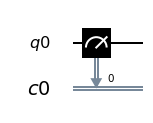

In [3]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)

circ = QuantumCircuit(qreg,creg)
circ.measure(0,0)

circ.draw(output='mpl')

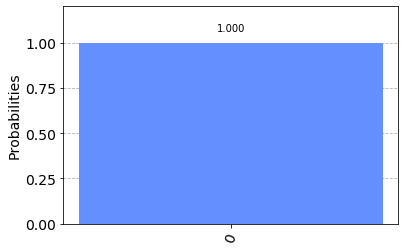

In [4]:
job = execute( circ, qbackend, shots=1000 )
counts = job.result().get_counts()

fig, ax = plt.subplots()
plot_histogram(counts, ax = ax)

Prepare the states:
- $\ket\psi = \frac{1}{\sqrt 2}\ket 0 + \frac{i}{\sqrt 2}\ket 1$
- $\ket\phi = \frac{i}{\sqrt 2}\ket 0 - \frac{1}{\sqrt 2}\ket 1$

counts_psi = {'1': 509, '0': 491}
counts_phi = {'1': 492, '0': 508}


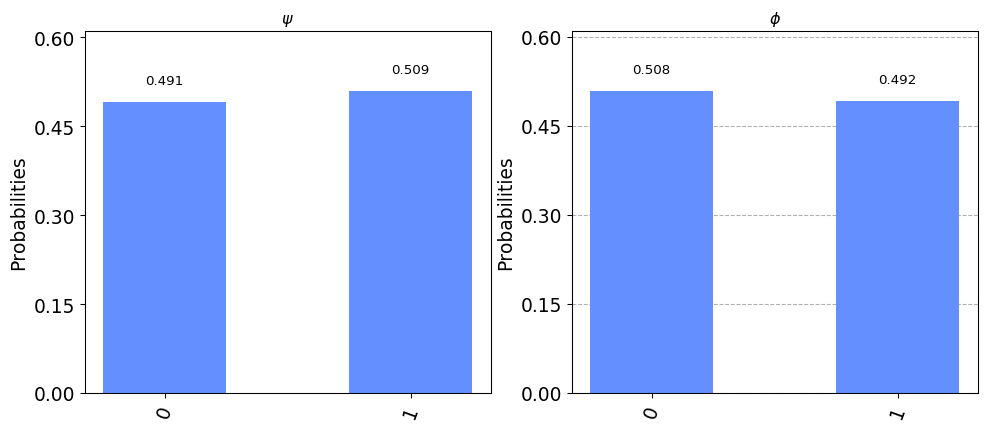

In [5]:
n_shots=1000

measure_psi = QuantumCircuit(1,1)
amps_psi = (1.0/np.sqrt(2))*np.array([1.0+0.0j, 0.0+1.0j])
measure_psi.initialize(amps_psi, 0)
measure_psi.measure(0,0)

job_psi = execute( measure_psi, qbackend, shots=n_shots )
counts_psi = job_psi.result().get_counts()
print("counts_psi =", counts_psi)

measure_phi = QuantumCircuit(1,1)
amps_phi = (1.0/np.sqrt(2))*np.array([0.0+1.0j, -1.0+0.0j])
measure_phi.initialize(amps_phi, 0)
measure_phi.measure(0,0)

job_phi = execute( measure_phi, qbackend, shots=n_shots )
counts_phi = job_phi.result().get_counts()
print("counts_phi =", counts_phi)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), dpi=96)
plot_histogram(counts_psi, ax=axes[0])
axes[0].set_title(r'$\psi$')
plot_histogram(counts_phi, ax=axes[1])
axes[1].set_title(r'$\phi$');

Prepare the states:
- $\ket\psi = \sqrt{0.45}\ket 0 + \sqrt{0.55}\ket 1$
- $\ket\phi = \sqrt{0.5}\ket 0 + \sqrt{0.5}\ket 1$

counts_psi = {'1': 5508, '0': 4492}
counts_phi = {'1': 5103, '0': 4897}


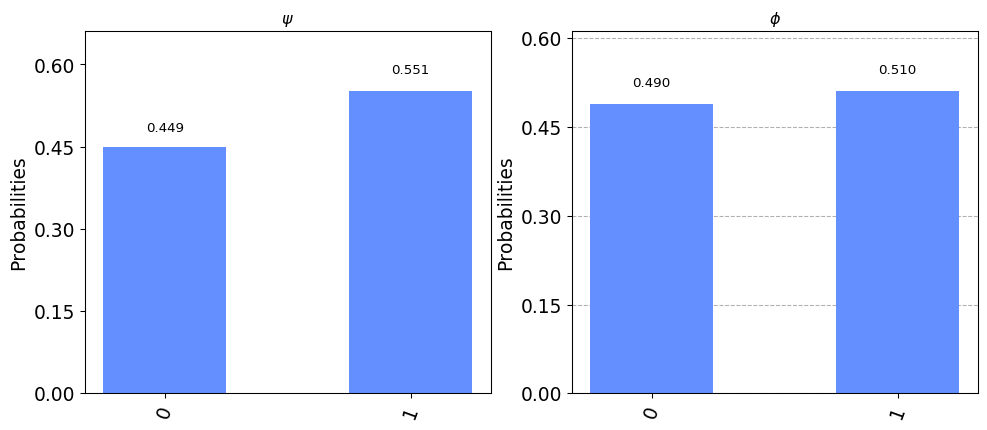

In [8]:
n_shots=10000

measure_psi = QuantumCircuit(1,1)
amps_psi = [np.sqrt(0.45), np.sqrt(0.55)]
measure_psi.initialize(amps_psi, 0)
measure_psi.measure(0,0)

job_psi = execute( measure_psi, qbackend, shots=n_shots )
counts_psi = job_psi.result().get_counts()
print("counts_psi =", counts_psi)

measure_phi = QuantumCircuit(1,1)
amps_phi = [np.sqrt(0.5), np.sqrt(0.5)]
measure_phi.initialize(amps_phi, 0)
measure_phi.measure(0,0)

job_phi = execute( measure_phi, qbackend, shots=n_shots )
counts_phi = job_phi.result().get_counts()
print("counts_phi =", counts_phi)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), dpi=96)
plot_histogram(counts_psi, ax=axes[0])
axes[0].set_title(r'$\psi$')
plot_histogram(counts_phi, ax=axes[1])
axes[1].set_title(r'$\phi$');

### Unitary matrix
- $U = \begin{bmatrix}a&b\\c&d\end{bmatrix}$
- $U^{\dagger} = (U^{\top})^* = \begin{bmatrix}a^*&c^*\\b^*&d^*\end{bmatrix}$
- $U$ is unitary $\iff U^{\dagger} = U^{-1} \iff UU^{\dagger} = U^{\dagger}U = \mathbb 1$ 

## Quantum gates
- <b>Any unitary matrix can be used as a quantum logic gate!</b>

### Single qubit gates:
- $X$ or NOT gate:
    $$X = \begin{bmatrix}0&1\\1&0\end{bmatrix}$$<br>
    $$\ket 0 \rightarrow \ket 1 \\ \ket 1 \rightarrow \ket 0$$

- $Y$ gate:
    $$Y = \begin{bmatrix}0&-i\\i&0\end{bmatrix}$$<br>
    $$\ket 0 \rightarrow i\ket 1 \\ \ket 1 \rightarrow -i\ket 0$$

- $Z$ gate:
    $$Z = \begin{bmatrix}1&0\\0&-1\end{bmatrix}$$<br>
    $$\ket 0 \rightarrow \ket 0 \\ \ket 1 \rightarrow -\ket 1$$

- $R_Z$ phase shift gate:
    $$R_Z(\phi) = \begin{bmatrix}1&0\\0&e^{i\phi}\end{bmatrix}$$<br>
    $$\ket 0 \rightarrow \ket 0 \\ \ket 1 \rightarrow e^{i\phi}\ket 1$$

- Hadamard gate:
    $$H = \frac{1}{\sqrt 2}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$$<br>
    $$\ket 0 \rightarrow \frac{\ket 0 + \ket 1}{\sqrt 2} = \ket + \\
      \ket 1 \rightarrow \frac{\ket 0 - \ket 1}{\sqrt 2} = \ket - $$

- $\sqrt X$ or $\sqrt{\text{NOT}}$ gate
    $$ \sqrt X = \frac{1}{2} \begin{bmatrix} 1+i & 1-i \\ 1-i & 1+i\end{bmatrix} $$<br>
    $$ \ket 0 \rightarrow \frac{(1+i)\ket 0 + (1-i)\ket 1}{2} \\
       \ket 1 \rightarrow \frac{(1-i)\ket 0 + (1+i)\ket 1}{2}$$

## Example 2: Apply gates to a single qubit

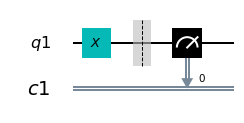

In [6]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)

circ = QuantumCircuit(qreg,creg)

# Apply gates
circ.x(0)

# Measure
circ.barrier(qreg)
circ.measure(0,0)

circ.draw(output='mpl')

Counts: {'1': 10000}


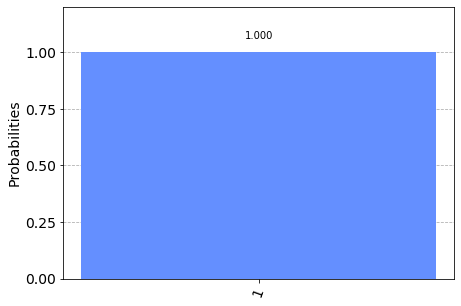

In [7]:
job = execute( circ, qbackend, shots=10000 )
state = job.result().get_counts()
print("Counts:", state)
plot_histogram(state)

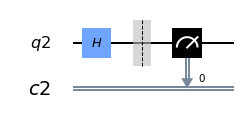

In [8]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)

circ = QuantumCircuit(qreg,creg)

# Apply gates
circ.h(0)

# Measure
circ.barrier(qreg)
circ.measure(0,0)

circ.draw(output='mpl')

Counts: {'0': 5041, '1': 4959}


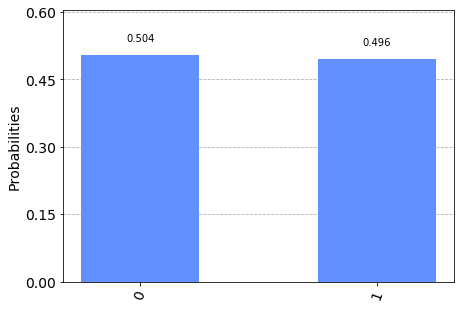

In [9]:
job = execute( circ, qbackend, shots=10000 )
state = job.result().get_counts()
print("Counts:", state)
plot_histogram(state)

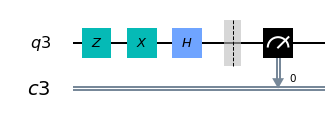

In [10]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)

circ = QuantumCircuit(qreg,creg)

# Apply gates
circ.z(0)
circ.x(0)
circ.h(0)

# Measure
circ.barrier(qreg)
circ.measure(0,0)

circ.draw(output='mpl')

Counts: {'0': 5047, '1': 4953}


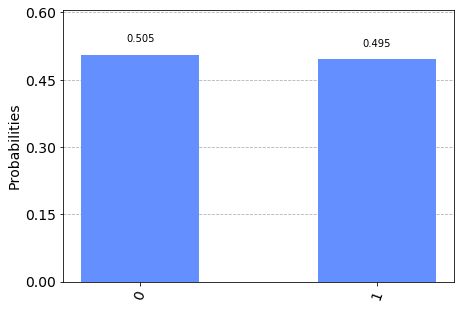

In [11]:
job = execute( circ, qbackend, shots=10000 )
state = job.result().get_counts()
print("Counts:", state)
plot_histogram(state)

## Multiple qubit systems

- Two qubits have 4 different states:
    - $\ket{00}, \ket{01}, \ket{10}, \ket{11}$
    - A general 2-qbit state is
    $$
    \ket\psi = \alpha_{00}\ket{00} + \alpha_{01}\ket{01} + \alpha_{10}\ket{10} + \alpha_{11}\ket{11}\\
    |\alpha_{00}|^2 + |\alpha_{01}|^2 + |\alpha_{10}|^2 + |\alpha_{11}|^2 = 1
    $$
    
- Three qubits have $2^3=8$ different states
- $n$ qubits have $2^n$ different states
- <b>To fully describe the $n$-qubit state, we need $2^n$ complex numbers</b>
- A $400$-qubit state is descibed by $2^{400}$ numbers. That is much more than the number of  protons in the entire Universe

### Two-qubit gates
- SWAP:
    $$SWAP = \begin{bmatrix}
    1&0&0&0\\
    0&0&1&0\\
    0&1&0&0\\
    0&0&0&1
    \end{bmatrix}$$<br>
    $$
    \text{SWAP}(\ket{01}) = \ket{10}\\
    \text{SWAP}(\ket{10}) = \ket{01}\\
    \text{SWAP}(\text{SWAP}(\ket{01})) = \ket{01}
    $$

- $\sqrt{\text{SWAP}}$:
    $$\sqrt{\text{SWAP}} = \begin{bmatrix}
    1&0&0&0\\
    0&\frac{1}{2}(1+i)&\frac{1}{2}(1-i)&0\\
    0&\frac{1}{2}(1-i)&\frac{1}{2}(1+i)&0\\
    0&0&0&1
    \end{bmatrix}$$<br>
    $$
    \sqrt{\text{SWAP}}\left(\sqrt{\text{SWAP}}(\ket{01})\right) = \ket{10}\\
    \sqrt{\text{SWAP}}\left(\sqrt{\text{SWAP}}(\ket{10})\right) = \ket{01}\\
    \left(\sqrt{\text{SWAP}}\right)^4(\ket{01}) = \ket{01}
    $$

- cX or cNOT:
    $$cX = \begin{bmatrix}
    1&0&0&0\\
    0&1&0&0\\
    0&0&0&1\\
    0&0&1&0
    \end{bmatrix}$$<br>
    - Apply X on the second qubit if the first qubit is $\ket 1$ else do nothing:
    $$
    \ket{00} \rightarrow \ket{00}\\
    \ket{01} \rightarrow \ket{01}\\
    \ket{10} \rightarrow \ket{11}\\
    \ket{11} \rightarrow \ket{10}
    $$

- cU:
    - If $U = \begin{bmatrix}a&b\\c&d\end{bmatrix}$, then
    $$cU = \begin{bmatrix}
    1&0&0&0\\
    0&1&0&0\\
    0&0&a&b\\
    0&0&c&d
    \end{bmatrix}$$<br>
    - Apply $U$ on the second qubit if the first qubit is $\ket 1$ else do nothing.

## Example 3: Measuring multi-qubit states

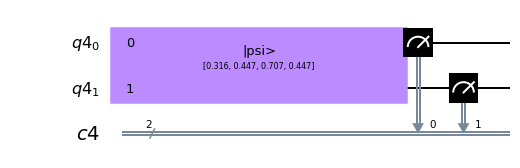

In [12]:
ps = np.array([0.1, 0.2, .5, .2])
amplitudes = np.sqrt(ps)

qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

circ = QuantumCircuit(qreg,creg)

circ.initialize(amplitudes, qreg)
circ.measure(qreg,creg)

circ.draw(output='mpl')

Counts: {'10': 4884, '00': 1004, '01': 2066, '11': 2046}


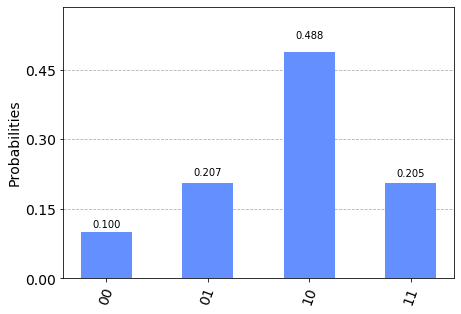

In [13]:
job = execute( circ, qbackend, shots=10000 )
state = job.result().get_counts()
print("Counts:", state)
plot_histogram(state)

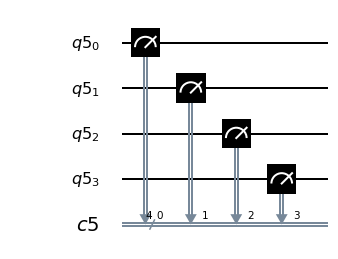

In [14]:
# Random 4-qubit state
ps = np.random.randint(0, 255, 16)
ps = ps/ps.sum()
amplitudes = np.sqrt(ps)

# Setup
qreg = QuantumRegister(4)
creg = ClassicalRegister(4)
circ = QuantumCircuit(qreg,creg)
circ.initialize(amplitudes, qreg)

# Measure
m = QuantumCircuit(qreg, creg)
m.measure(qreg, creg)

job = execute( circ+m, qbackend, shots=10000 )
counts = job.result().get_counts()

m.draw(output='mpl')

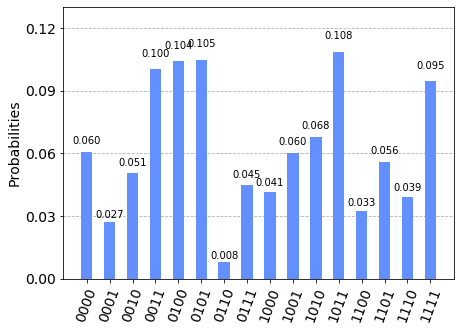

In [15]:
plot_histogram(counts)

## Example 4: Applying multi-qubit gates

Prepare the following state: $\frac{\ket{00}-\ket{11}}{\sqrt 2}$

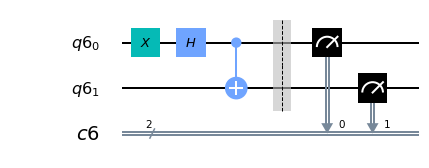

In [16]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

circ = QuantumCircuit(qreg,creg)

circ.x(0)
circ.h(0)
circ.cx(0,1)

circ.barrier(qreg)
circ.measure(qreg,creg)

circ.draw(output='mpl')

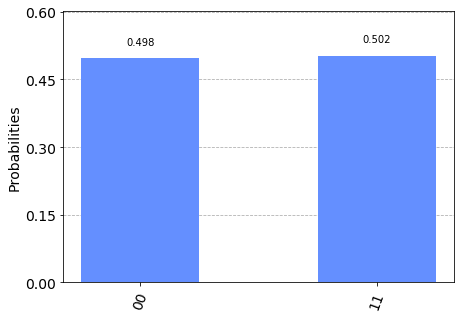

In [17]:
job = execute( circ, qbackend, shots=10000 )
counts = job.result().get_counts()
plot_histogram(counts)

Homework: $$\frac{\ket{01}-\ket{10}}{\sqrt 2}$$

## Example 5: Quantum teleportation:
- Teleport the quantum state $\ket\psi$ from A to B with the help of a classical channel
- destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location
- uses quantum entanglement and a classical channel.
- no FTL communication
## TODO

## Example 6: Superdense coding
- Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

<img src="./images/superdense.png"></img>

### The algorithm:
- Step 1: Prepare a Bell pair $\ket\psi = \frac{\ket{00} + \ket{11}}{\sqrt 2}$
- Step 2: Send the first qubit to Alice, the second to Bob
- Step 3: Alice encodes 2 classical bits into her qubit by applying gates on it
    - Rules: 
    $$\begin{align*}
    &00 \rightarrow I\\
    &01 \rightarrow X\\
    &10 \rightarrow Z\\
    &11 \rightarrow XZ
    \end{align*}
    $$
- Step 4: Alice sends the qubit to Bob
- Step 5: Bob now measures the 2 qubits and receives the 2 classical bits

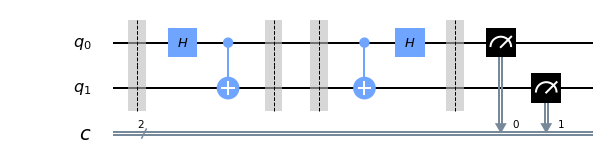

In [13]:
# Create the quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

qc.barrier()


# First generate the entangled pair between Alice and Bob (Remember: Hadamard followed by CX generates a Bell pair)
# At this point, qubit 1 goes to Bob and qubit 2 goes to Alice
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Next, Alice encodes her message. First, we need to prepare the state Alice will like to send,
# In this tutorial, Alice is sending 11:

#qc.x(0)
#qc.z(0)
qc.barrier()

# Alice then sends her qubit to Bob.
# After recieving qubit 0, Bob applies the recovery protocol:
qc.cx(0, 1)
qc.h(0)

# Let's take a measurement to see which classical bit of information Bob receives:
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

# Draw our output
qc.draw(output = "mpl")

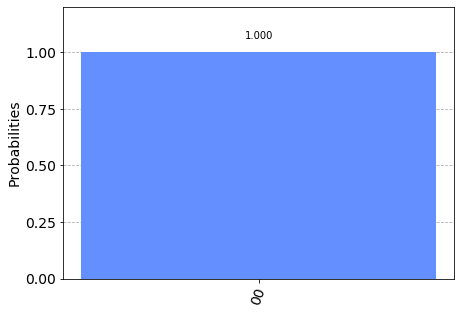

In [14]:
job = execute( qc, qbackend, shots=10000 )
counts = job.result().get_counts()
plot_histogram(counts)

# Sandbox

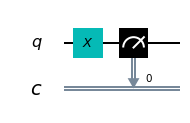

In [20]:
q1 = QuantumCircuit(1,1)
q1.x(0)
q1.measure(0,0)
q1.draw(output = 'mpl')

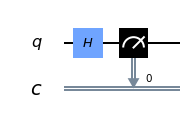

In [21]:
q2 = QuantumCircuit(1,1)
q2.h(0)
q2.measure(0,0)
q2.draw(output = 'mpl')

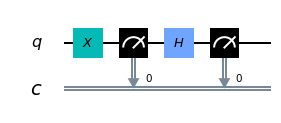

In [22]:
q = q1 + q2
q.draw(output = 'mpl')